<a href="https://colab.research.google.com/github/karthikpuranik11/FIRE2021/blob/main/Tamil/Bert%2BbiLSTM_Tamil_transliterated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers==3.3.1

     |████████████████████████████████| 1.1 MB 7.6 MB/s 
     |████████████████████████████████| 895 kB 63.0 MB/s 
     |████████████████████████████████| 1.2 MB 42.8 MB/s 
     |████████████████████████████████| 3.0 MB 57.6 MB/s 


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
train1=pd.read_csv('/content/tam_final.csv', engine='python')
train1['labels']=LabelEncoder().fit_transform(train1['category'])
#train=train.drop(columns='label')
train1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,text,category,trans,translate,labels
0,0,0,0,Vani bhojam fans hit like solli 500 like Vangi...,unknown_state,வாணி பூஜாம் பான்ஸ் ஹிட் லிக் சொல்லி 500 லிக் வ...,Vani Pujan Pans Hit Leak: Get 500 Leak Banks\n,5
1,1,1,1,I love you ajith very I like,Positive,ஐஸ் லோவ் யூ அஜித் வேரி ஐஸ் லிக்,Ice Love You Ajith very Ice Lick\n,2
2,2,2,2,ennaya trailer Ku mudi Ellam nikkudhu... Vera ...,Positive,எண்ணய டிரைலர் கூ முடி எல்லம் நிக்குது... வேற ல...,The oil trailer has all the hair and the trail...,2
3,3,3,3,Vijay Annaa Ur Maassssss Therrrrriiiiii,Positive,விஜய் அன்னா உர் மாசஸ் தெற்றி,Vijay Anna Ur Masse Thetti\n,2
4,4,4,4,நம்ப நடே நாசாமா தான் போச்சி,Negative,நம்ப நடே நாசாமா தான் போச்சி,Believe it or not\n,1
...,...,...,...,...,...,...,...,...
35651,35651,35651,35651,ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி போடுவது...,Mixed_feelings,ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி போடுவது...,It is wrong to blame everyone for a mistake.\n,0
35652,35652,35652,35652,Repeated Mode to Watching Theri Trailer & Ther...,Positive,ரிப்பியட்டா மோடு டோ வாட்சிங் தேரி டிரைலர் & தே...,For details: Phone call between Prime Minister...,2
35653,35653,35653,35653,yeevanikuachu pula kutti erudhal oodi poyidu....,Negative,எவனிகுசு புல குட்டி ஏறுதல் ஓடி போயிடு. மவானி க...,"Run away, run away, run away!\n",1
35654,35654,35654,35654,She is looking like laughing budha,Positive,ஷே ஐஸ் லூகிங் லிக் லூகிங் புத,She-Ice Looking Lick Looking Buddha\n,2


In [3]:
train1['category'].value_counts()

Positive          20069
unknown_state      5628
Negative           4271
Mixed_feelings     4020
not-Tamil          1667
Positive              1
Name: category, dtype: int64

In [4]:
for i in range(len(train1)):
  train1['trans'][i]=train1['trans'][i][8:-2]
  if train1['category'][i]=='not-Tamil':
    train1['trans'][i]='NaN'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
train=pd.DataFrame(columns=['labels','tweets'])
train['labels']=train1['labels'].append(train1['labels'])
train['tweets']=train1['text'].append(train1['trans'])
train

,labels,tweets
0,5,Vani bhojam fans hit like solli 500 like Vangi...
1,2,I love you ajith very I like
2,2,ennaya trailer Ku mudi Ellam nikkudhu... Vera ...
3,2,Vijay Annaa Ur Maassssss Therrrrriiiiii
4,1,நம்ப நடே நாசாமா தான் போச்சி
...,...,...
35651,0,ெய்த தவறுக்காக எல்லாரையும் பழி போடுவது தவறு நண...
35652,2,்டா மோடு டோ வாட்சிங் தேரி டிரைலர் & தேரி சாங்ஸ...
35653,1,புல குட்டி ஏறுதல் ஓடி போயிடு. மவானி கோல கண்டி...
35654,2,ூகிங் லிக் லூகிங் ப


In [6]:
train=train.dropna()
train

,labels,tweets
0,5,Vani bhojam fans hit like solli 500 like Vangi...
1,2,I love you ajith very I like
2,2,ennaya trailer Ku mudi Ellam nikkudhu... Vera ...
3,2,Vijay Annaa Ur Maassssss Therrrrriiiiii
4,1,நம்ப நடே நாசாமா தான் போச்சி
...,...,...
35651,0,ெய்த தவறுக்காக எல்லாரையும் பழி போடுவது தவறு நண...
35652,2,்டா மோடு டோ வாட்சிங் தேரி டிரைலர் & தேரி சாங்ஸ...
35653,1,புல குட்டி ஏறுதல் ஓடி போயிடு. மவானி கோல கண்டி...
35654,2,ூகிங் லிக் லூகிங் ப


In [7]:
val=pd.read_csv('/content/tamil_sentiment_full_test_withtlabels.tsv', sep="\t")
#val['tweet']=val['text']
#val=val.drop(columns=['Unnamed: 2','text'])
val['labels']=LabelEncoder().fit_transform(val['category'])
val['tweets']=val['text']
val=val.drop(columns=['category','text'])
val

,id,labels,tweets
0,Tam_1,2,வீர செங்குந்தர் சார்பாக இந்த திரைப்படம் வெற்றி...
1,Tam_2,1,Teruk ah irukku .... mokke movie .. waste of time
2,Tam_3,2,manitha samuthaayam amaipil irunthu intha pada...
3,Tam_4,2,JJ mam we miss u
4,Tam_5,3,Subtitle me traller dekhne wale like karo
...,...,...,...
4397,Tam_4398,1,Ithukum dislike potta kammanattti koovaingalam...
4398,Tam_4399,0,Suyama Sinthikiravan than super Hero Seama dia...
4399,Tam_4400,2,Super thalaiva.... Nee mass dha eppavume
4400,Tam_4401,4,பெண்ணை அடிமையாக்க நினைக்கும் இந்த படம் தோல்வித...


In [8]:

import pandas as pd
from torch.utils.data import Dataset,DataLoader

class RFDataset(Dataset):
  def __init__(self,text,label,tokenizer,max_len):
    self.text = text
    self.label = label
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.text)
  
  def __getitem__(self,item):
    text = str(self.text[item])
    label = self.label[item]

    encoding = self.tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length = self.max_len,
        return_token_type_ids = False,
        padding = 'max_length',
        return_attention_mask= True,
        return_tensors='pt',
        truncation=True
    )

    return {
        'text' : text,
        'input_ids' : encoding['input_ids'].flatten(),
        'attention_mask' : encoding['attention_mask'].flatten(),
        'label' : torch.tensor(label,dtype=torch.long)

    }

In [9]:
 
print('Training set size:',train.shape)
#Uncomment the next line when we have the test data
#print('Testing set size:',test.shape)
print('validation set size:',val.shape)

Training set size: (71312, 2)
validation set size: (4402, 3)


In [10]:
import numpy as np

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(train.labels.values),
                                                  train.labels.values)
class_weights

array([1.47827529e+00, 1.39139936e+00, 2.96111748e-01, 5.94266667e+03,
       3.56488702e+00, 1.05591092e+00])

In [11]:

def create_data_loader(df,tokenizer,max_len,batch_size):
  ds = RFDataset(
      text = df.tweets.to_numpy(),
      label = df.labels.to_numpy(),
      tokenizer = tokenizer,
      max_len = max_len
  )

  return DataLoader(ds,
                    batch_size = batch_size,
                    shuffle = True,
                    num_workers=4)

In [12]:
from transformers import XLNetTokenizer,XLNetModel,AdamW,get_linear_schedule_with_warmup,AutoModel,AutoTokenizer
device = 'cuda'
PRE_TRAINED_MODEL_NAME = 'bert-base-multilingual-uncased'
tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)


In [13]:
BATCH_SIZE = 32
MAX_LEN = 128
train_data_loader = create_data_loader(train,tokenizer,MAX_LEN,BATCH_SIZE)
val_data_loader = create_data_loader(val,tokenizer,MAX_LEN,BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [14]:
BERT_model = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [15]:
import torch
import torch.nn as nn
class RFClassifier(nn.Module):
  def __init__(self, n_classes):
    super(RFClassifier, self).__init__()
    self.auto = AutoModel.from_pretrained('bert-base-multilingual-uncased')
    self.lstm = nn.LSTM(768, 256, batch_first=True,bidirectional=True)
    self.linear = nn.Linear(256*2, 128)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.4)
    self.out = nn.Linear(128, n_classes)
  
  def forward(self, input_ids, attention_mask):
    sequence_output, pooled_output = self.auto(input_ids, 
               attention_mask=attention_mask)

    # sequence_output has the following shape: (batch_size, sequence_length, 768)
    lstm_output, (h,c) = self.lstm(sequence_output) ## extract the 1st token's embeddings
    hidden = torch.cat((lstm_output[:,-1, :256],lstm_output[:,0, 256:]),dim=-1)
    linear_output = self.linear(lstm_output[:,-1].view(-1,256*2)) ### assuming that you are only using the output of the last LSTM cell to perform classification

    return linear_output

In [16]:
model = RFClassifier(5)
model = model.to(device)

In [17]:
EPOCHS = 5
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [18]:

def train_epoch(model,data_loader,loss_fn,optimizer,device,scheduler,n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for data in data_loader:
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['label'].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
            )
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs,labels)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

In [19]:

def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      labels = d["label"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, labels)
      correct_predictions += torch.sum(preds == labels)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

In [20]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [21]:
from collections import defaultdict
import torch
 
history = defaultdict(list)
best_accuracy = 0
for epoch in range(EPOCHS):
 
 
  start_time = time.time()
  train_acc,train_loss = train_epoch(
      model,
      train_data_loader,
      loss_fn,
      optimizer,
      device,
      scheduler,
      len(train)
  )
   
  
  val_acc,val_loss = eval_model(
      model,
      val_data_loader,
      loss_fn,
      device,
      len(val)
  )
  
  end_time = time.time()
  epoch_mins, epoch_secs = epoch_time(start_time, end_time)
  print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
  print(f'Train Loss {train_loss} accuracy {train_acc}')
  print(f'Val Loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(),'bert-base-multilingual-uncased.bin')
    best_accuracy = val_acc

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 01 | Epoch Time: 30m 1s
Train Loss 1.07650526698901 accuracy 0.5989314561364146
Val Loss 1.8820223600968071 accuracy 0.5352112676056338

Epoch: 02 | Epoch Time: 30m 7s
Train Loss 0.9310053665710705 accuracy 0.636288422705856
Val Loss 1.8706726168376813 accuracy 0.5761017719218536

Epoch: 03 | Epoch Time: 30m 8s
Train Loss 0.8576169190598262 accuracy 0.6670125645052726
Val Loss 1.9022159304307855 accuracy 0.5536119945479328

Epoch: 04 | Epoch Time: 30m 9s
Train Loss 0.7942191688882871 accuracy 0.6934877720439758
Val Loss 1.9829344136127527 accuracy 0.558382553384825

Epoch: 05 | Epoch Time: 30m 8s
Train Loss 0.7433928059937976 accuracy 0.7145922144940543
Val Loss 2.0013601931108944 accuracy 0.5502044525215811



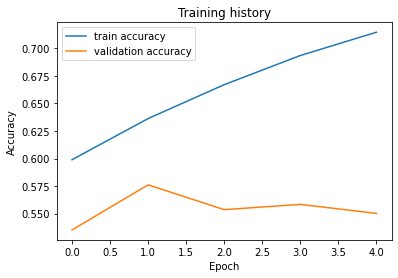

In [22]:
import matplotlib.pyplot as plt
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
#plt.ylim([0, 1]);

In [23]:
val_acc, _ = eval_model(
  model,
  val_data_loader,
  loss_fn,
  device,
  len(val) #Change it to test when you have the test results
)
val_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.5502044525215811

In [24]:
def get_predictions(model, data_loader):
  model = model.eval()
  sentence = []
  predictions = []
  prediction_probs = []
  real_values = []
  with torch.no_grad():
    for d in data_loader:
      texts = d["text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      labels = d["label"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      sentence.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
      real_values.extend(labels)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return sentence, predictions, prediction_probs, real_values

In [25]:

y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  val_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred,zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.3194    0.1957    0.2427       470
           1     0.4042    0.4423    0.4224       477
           2     0.7597    0.8233    0.7902      2546
           3     0.0000    0.0000    0.0000       244
           4     0.1065    0.0346    0.0522       665
           5     0.0000    0.0000    0.0000         0

    accuracy                         0.5502      4402
   macro avg     0.2650    0.2493    0.2513      4402
weighted avg     0.5334    0.5502    0.5366      4402

